In [1]:
import numpy as np
import h5py 
# plotting
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
colors = ['#377eb8', '#ff7f00', '#4daf4a',
            '#f781bf', '#a65628', '#984ea3',
            '#999999', '#e41a1c', '#dede00', 'b', 'k']

In [3]:
correlations = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
thresholds = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [4]:
filename = 'uoicorr.h5'
file = h5py.File(filename, 'r')

In [5]:
fn = file['fn'][:]
r2 = file['r2'][:]
r2_true = file['r2_true'][:]

# False Negatives vs. Threshold

In [6]:
fn_avg = np.mean(fn, axis=0)
fn_std = np.std(fn, axis=0)

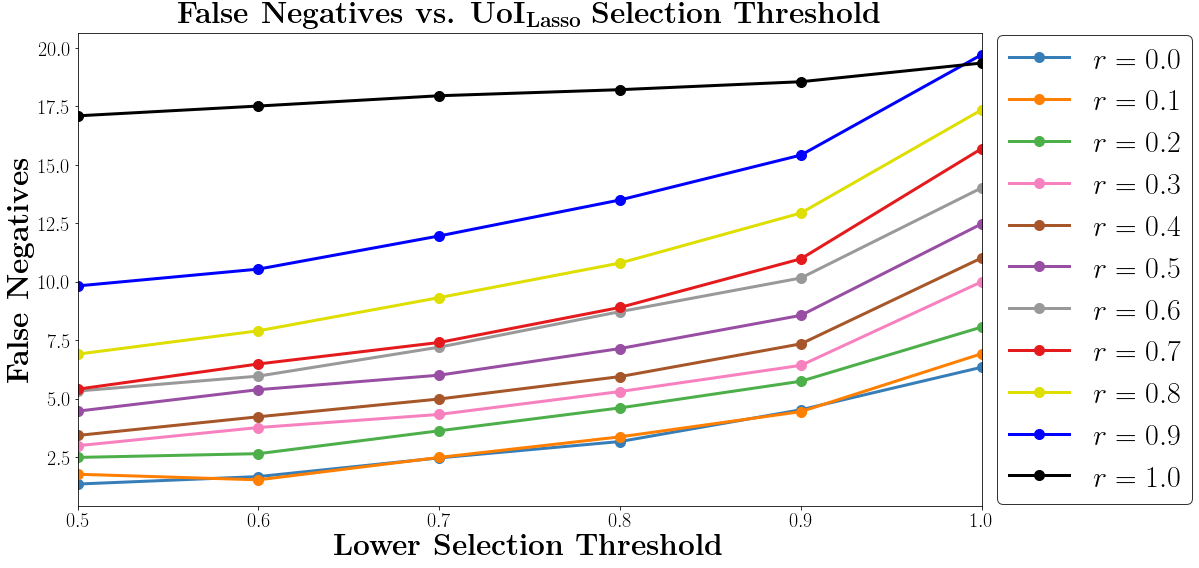

In [13]:
fig, ax = plt.subplots(figsize=(14, 8))
[ax.errorbar(thresholds, fn_avg[idx, :], linewidth=3, marker='o', color=colors[idx], markersize=10, label=r'$r=%s$' %corr) for idx, corr in enumerate(correlations)]
ax.set_xlim([0.5, 1.0])
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 30})
lgd.get_frame().set_edgecolor('k')
ax.set_xlabel(r'\textbf{Lower Selection Threshold}')
ax.set_ylabel(r'\textbf{False Negatives}')
ax.set_title(r'\textbf{False Negatives vs. UoI}$_{\mathbf{Lasso}}$ \textbf{Selection Threshold}')
plt.tight_layout()
plt.savefig('fn_vs_lower_threshold.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

# $R^2$ vs. Threshold

In [8]:
r2_avg = np.median(r2, axis=0)
r2_std = np.std(r2, axis=0)
r2_med_true = np.median(r2_true, axis=0)

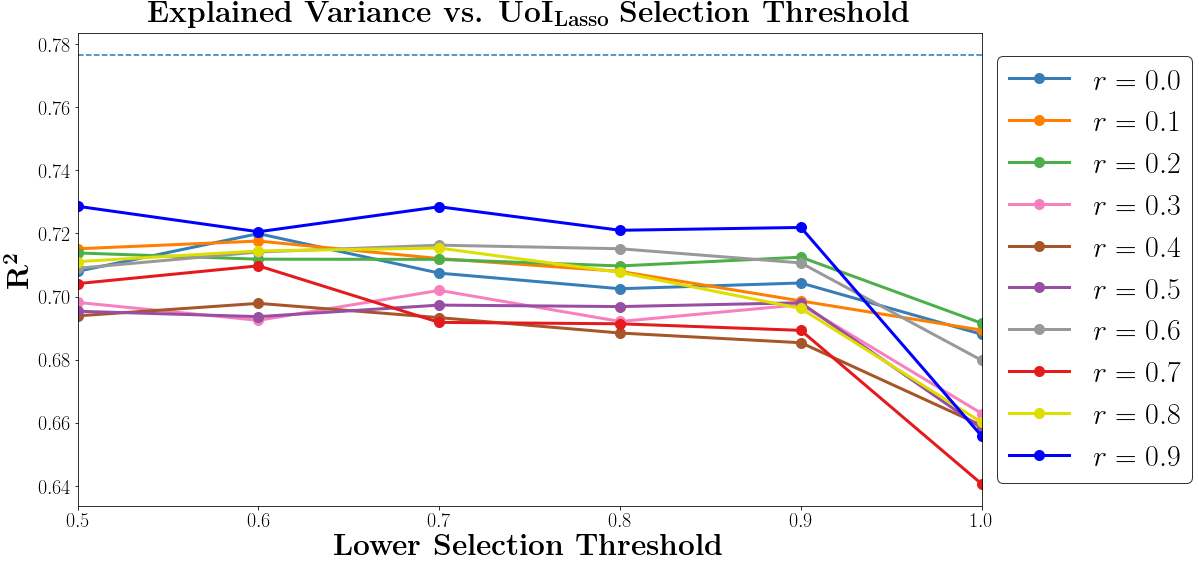

In [12]:
fig, ax = plt.subplots(figsize=(14, 8))
[ax.errorbar(thresholds, r2_avg[idx, :], linewidth=3, marker='o', color=colors[idx], markersize=10, label=r'$r=%0.1f$' %corr) for idx, corr in enumerate(0.1 * np.arange(10))]
ax.plot(thresholds, r2_med_true[0, :], '--')
ax.set_xlim([0.5, 1.0])
lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size' : 30})
lgd.get_frame().set_edgecolor('k')
ax.set_xlabel(r'\textbf{Lower Selection Threshold}')
ax.set_ylabel(r'$\mathbf{R^2}$')
ax.set_title(r'\textbf{Explained Variance vs. UoI}$_{\mathbf{Lasso}}$ \textbf{Selection Threshold}')
plt.tight_layout()
plt.savefig('r2_vs_lower_threshold.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()